In [20]:
import time

import numpy as np
from sklearn.decomposition import PCA 

from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

import matplotlib.pyplot as plt

In [21]:
def PCA_trans(data, n):
    # Initialize PCA with desired number of components
    pca = PCA(n_components=n)
    # Fit PCA to data
    pca.fit(data)
    # Get principal components
    components = pca.components_
    # Transform your data to the lower-dimensional space
    transformed_data = pca.transform(data)

    return transformed_data, components

In [22]:
def MyRF(transformed_data, labels, test_s, random_s, n_est):
    # Split the transformed data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(transformed_data, labels, test_size=test_s, random_state=random_s)

    # Initialize the Random Forest Classifier
    rf_classifier = RandomForestClassifier(n_estimators=n_est, random_state=random_s)

    # Train the classifier
    rf_classifier = rf_classifier.fit(X_train, y_train)

    # Predict on the test set
    predictions = rf_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

In [23]:
def MyGradBoost(transformed_data, labels, test_s, random_s, n_est):
    # Split the transformed data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(transformed_data, labels, test_size=test_s, random_state=random_s)

    # Initialize the Gradient Boosting classifier
    gb_classifier = GradientBoostingClassifier(n_estimators=n_est, random_state=random_s)

    # Train the classifier
    gb_classifier.fit(X_train, y_train)

    # Predict on the test set
    predictions = gb_classifier.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, predictions)
    return accuracy

In [24]:
# DATA load and LABELS creation

data = np.loadtxt('mfeat-pix.txt')
labels = np.zeros(2000)
for i in range(10):
    labels[i*200:i*200+200] = i

Starting the # of components evaluation...
Accuracy for 1 PCA components: 0.334
Accuracy for 2 PCA components: 0.565
Accuracy for 3 PCA components: 0.772
Accuracy for 4 PCA components: 0.831
Accuracy for 5 PCA components: 0.875
Accuracy for 6 PCA components: 0.903
Accuracy for 7 PCA components: 0.913
Accuracy for 8 PCA components: 0.93
Accuracy for 9 PCA components: 0.94
Accuracy for 10 PCA components: 0.938
Accuracy for 11 PCA components: 0.938
Accuracy for 12 PCA components: 0.94
Accuracy for 13 PCA components: 0.947
Accuracy for 14 PCA components: 0.954
Accuracy for 15 PCA components: 0.953
Accuracy for 16 PCA components: 0.947
Accuracy for 17 PCA components: 0.95
Accuracy for 18 PCA components: 0.955
Accuracy for 19 PCA components: 0.95
Accuracy for 20 PCA components: 0.953
Accuracy for 21 PCA components: 0.962
Accuracy for 22 PCA components: 0.956
Accuracy for 23 PCA components: 0.958
Accuracy for 24 PCA components: 0.956
Accuracy for 25 PCA components: 0.956
Accuracy for 26 PCA c

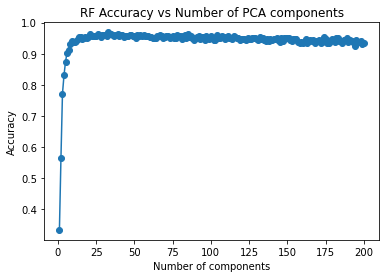

Random Forest results:
Number of trees: 100
Maximum accuracy: 0.969
Reached for 33 components.


In [25]:
n = 200
r_num = 42
n_trees = 100

def Comp_Search(data, n, labels, r_num, n_trees):
    # Trains and tests the dataset on n components
    print('Starting the # of components evaluation...')
    accuracy = np.zeros(n)
    for j in range(n):
        tdata, _ = PCA_trans(data, j+1)
        accuracy[j] = MyRF(tdata, labels, 0.5, r_num, n_trees)
        print(f'Accuracy for {j+1} PCA components: {accuracy[j]}')
    return accuracy

start_time = time.time()
accuracy = Comp_Search(data, n, labels, r_num, n_trees)

# Save Random Forest accuracy data
np.savetxt('accuracy_RF.txt', accuracy, delimiter='\n')

print(f'It took {time.time()-start_time:.2f} seconds')

# Plots of accuracy vs number of components
plt.plot(range(1,len(accuracy)+1), accuracy, linestyle='-', marker='o')
plt.title('RF Accuracy vs Number of PCA components')
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.show()

print('Random Forest results:\n'+
      f'Number of trees: {n_trees}\n'+
      f'Maximum accuracy: {np.max(accuracy)}\n'+
      f'Reached for {np.where(accuracy == np.max(accuracy))[0][0]+1} components.')

Starting the # of components evaluation...
Accuracy for 1 PCA components: 0.346
Accuracy for 2 PCA components: 0.59
Accuracy for 3 PCA components: 0.735
Accuracy for 4 PCA components: 0.805
Accuracy for 5 PCA components: 0.842
Accuracy for 6 PCA components: 0.861
Accuracy for 7 PCA components: 0.889
Accuracy for 8 PCA components: 0.903
Accuracy for 9 PCA components: 0.898
Accuracy for 10 PCA components: 0.913
Accuracy for 11 PCA components: 0.913
Accuracy for 12 PCA components: 0.913
Accuracy for 13 PCA components: 0.924
Accuracy for 14 PCA components: 0.92
Accuracy for 15 PCA components: 0.92
Accuracy for 16 PCA components: 0.917
Accuracy for 17 PCA components: 0.921
Accuracy for 18 PCA components: 0.919
Accuracy for 19 PCA components: 0.922
Accuracy for 20 PCA components: 0.925
Accuracy for 21 PCA components: 0.924
Accuracy for 22 PCA components: 0.92
Accuracy for 23 PCA components: 0.922
Accuracy for 24 PCA components: 0.925
Accuracy for 25 PCA components: 0.919
Accuracy for 26 PCA 

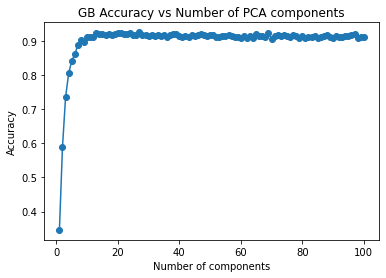

Gradient Boosting results:
Number of estimators: 100
Maximum accuracy: 0.926 reached for 27 components.


In [26]:
n = 200
r_num = 42
n_estim = 100

gb_s = [i for i in range(1,101)]

def Comp_Search_GB(data, n, labels, r_num, n_estim):
    # Trains and tests the dataset on n components
    print('Starting the # of components evaluation...')
    accuracy = np.zeros(n)
    for j in range(len(gb_s)):
        tdata, _ = PCA_trans(data, gb_s[j])
        accuracy[j] = MyGradBoost(tdata, labels, 0.5, r_num, n_estim)
        print(f'Accuracy for {gb_s[j]} PCA components: {accuracy[j]}')
    return accuracy

start_time = time.time()
accuracy_GB = Comp_Search_GB(data, len(gb_s), labels, r_num, n_trees)

results = np.column_stack((np.array(gb_s), accuracy_GB))

np.savetxt('accuracy_GB.txt', results)

print(f'It took {time.time()-start_time:.2f} seconds')

plt.plot(gb_s, accuracy_GB, linestyle='-', marker='o')
plt.title('GB Accuracy vs Number of PCA components')
plt.xlabel('Number of components')
plt.ylabel('Accuracy')
plt.show()

print('Gradient Boosting results:\n'+
      f'Number of estimators: {n_estim}\n'+
      f'Maximum accuracy: {np.max(accuracy_GB)} '+
      f'reached for {gb_s[np.where(accuracy_GB == np.max(accuracy_GB))[0][0]]} components.')